In [18]:
import numpy as np
import pandas as pd 
import scipy.sparse

from math import ceil

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from datetime import datetime, date
import time

In [14]:
items = pd.read_csv('../coursera/howtowin_ds_compe/input/items.csv')
shops = pd.read_csv('../coursera/howtowin_ds_compe/input/shops.csv')
cats = pd.read_csv('../coursera/howtowin_ds_compe/input/item_categories.csv')
train = pd.read_csv('../coursera/howtowin_ds_compe/input/sales_train.csv.gz')

In [19]:
train['month'] = train.date.apply(lambda x: datetime.strptime(x, '%d.%m.%Y').strftime('%m'))
train['year'] = train.date.apply(lambda x: datetime.strptime(x, '%d.%m.%Y').strftime('%Y'))

In [26]:
train['date'] = train.date.apply(lambda x: datetime.strptime(x, '%d.%m.%Y'))

In [25]:
train.dtypes

date               object
date_block_num      int64
shop_id             int64
item_id             int64
item_price        float64
item_cnt_day      float64
month              object
year               object
dtype: object

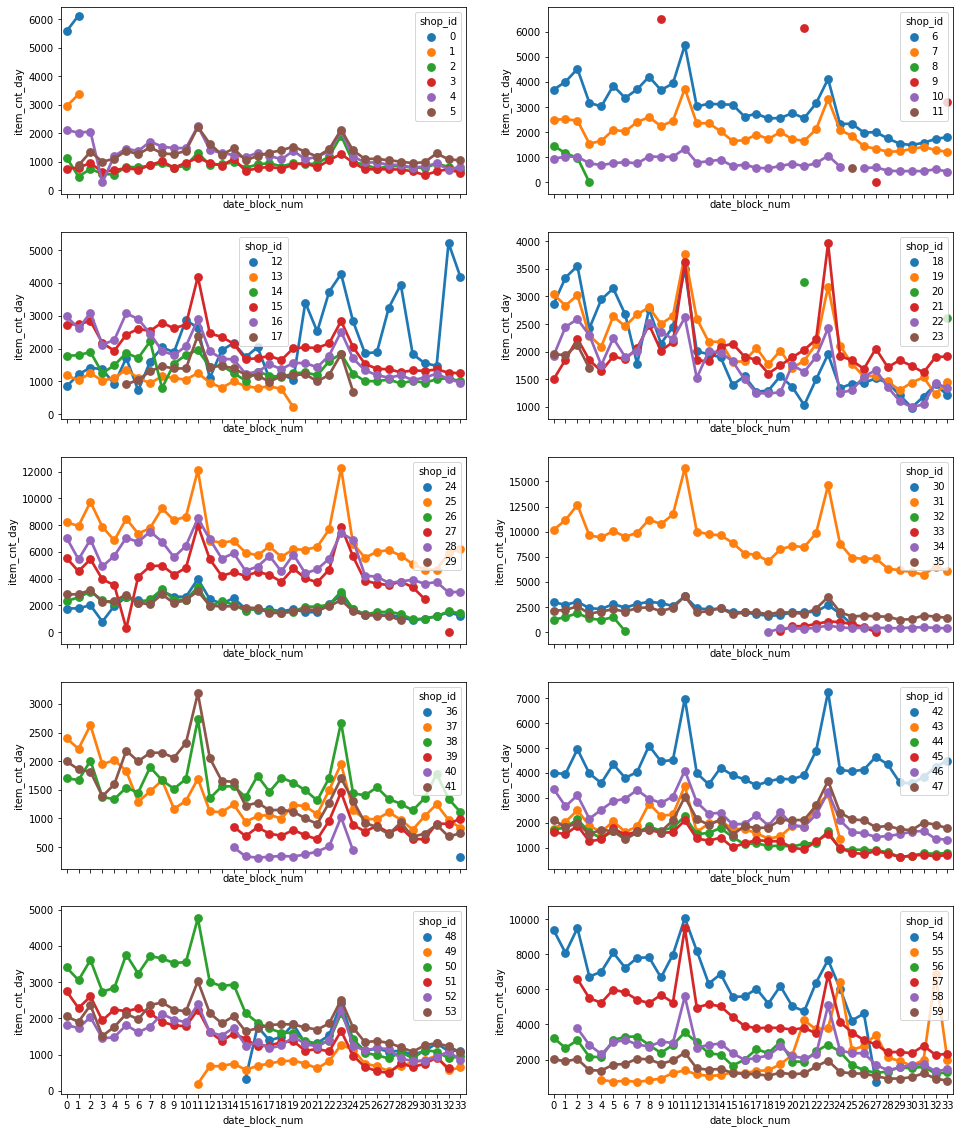

In [28]:
# 横軸：発行日
# 縦軸：累計TRX　または　累計購入金額
# 色：チャネル単位
grouped = pd.DataFrame(train.groupby(['shop_id', 'date_block_num'])['item_cnt_day'].sum().reset_index())

fig, axes = plt.subplots(nrows = 5, ncols = 2, sharex = True, figsize =(16, 20))
num_graph = 10
id_per_graph = ceil(grouped.shop_id.max() / num_graph)
count = 0

for i in range(5):
    for j in range(2):
        sns.pointplot(x='date_block_num', y='item_cnt_day', hue='shop_id', data=grouped[np.logical_and(count*id_per_graph <= grouped['shop_id'], grouped['shop_id'] < (count+1)*id_per_graph)], ax=axes[i][j])
        count += 1

In [ ]:
# チャネルごとのハコひげ図
# 横：チャネル　縦：TRXまたは金額
sns.catplot(data=titanic, kind='box', x='activation_channel', y='age')#, col='sex')

In [ ]:
# 散布図
# 入金金額と支払金額
# データ量が多いので、「1月発行のカード」等絞る
sns.jointplot('sepal_width', 'petal_length', data=iris)

In [ ]:
# 等高線で密度を表示
sns.jointplot('petal_width', 'petal_length',data=iris, kind="kde")